In [70]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import re
from matplotlib import gridspec
import scipy.stats as stats
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib import rcParams 
# from matplotlib import style
from matplotlib.colors import ListedColormap # control color in seaborn heatmap
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.patheffects as path_effects

In [71]:
palms=pd.read_csv('./palms_alltraits_curated_20200331.csv',sep='\t')
palms.columns

Index(['Unnamed: 0', 'index', 'species', 'Unnamed: 0.1', 'bio1', 'bio2',
       'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10',
       'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18',
       'bio19', 'decimalLatitude', 'decimalLongitude', 'nutrient_avail',
       'nutrient_retention', 'rooting_conditions', 'oxygen_avail_toroots',
       'excess_salts', 'toxicity', 'workability', 'tip_name', 'induplicate',
       'ind_variable', 'ind_variance', 'ind_cos-palmate', 'ind_pinnate',
       'ind_entire', 'ind_bipinnate', 'reduplicate', 'red_variable',
       'red_variance', 'red_cos-palmate', 'red_pinnate', 'red_entire',
       'plication', 'shape', 'variation', 'cos-palmate_binomial',
       'pinnate_binomial', 'entire_binomial', 'variable_binomial',
       'bipinnate_binomial', 'PalmTribe', 'PalmSubfamily', 'Climbing',
       'Acaulescent', 'MaxStemHeight_m', 'MaxStemDia_cm', 'MaxLeafNumber',
       'Max_Blade_Length_m', 'Max_Rachis_Length_m', 'Max_Pe

In [72]:
all_variables=palms[['bio1','bio2','bio3','bio4','bio5','bio6','bio7','bio8','bio9','bio10','bio11','bio12','bio13','bio14','bio15','bio16','bio17','bio18','bio19',
              'nutrient_avail','nutrient_retention','rooting_conditions','oxygen_avail_toroots','excess_salts','toxicity','workability',
               'MaxStemHeight_m','MaxStemDia_cm','MaxLeafNumber','Max_Blade_Length_m','Max_Rachis_Length_m','Max_Petiole_length_m','StemHeight+BladeLength']]
np.random.seed(666)
all_rho, all_pval=stats.spearmanr(all_variables,axis=0,nan_policy='omit')
print(all_pval)

[[0.00000000e+000 1.36796019e-034 2.79287765e-058 ... 2.73913082e-015
  3.38523708e-014 3.86126395e-010]
 [1.36796019e-034 0.00000000e+000 3.70936585e-014 ... 2.11542118e-002
  8.42184950e-001 8.31746329e-005]
 [2.79287765e-058 3.70936585e-014 0.00000000e+000 ... 1.28224326e-003
  1.91119022e-002 4.39316358e-001]
 ...
 [2.73913082e-015 2.11542118e-002 1.28224326e-003 ... 0.00000000e+000
  1.59357180e-062 7.97519969e-171]
 [3.38523708e-014 8.42184950e-001 1.91119022e-002 ... 1.59357180e-062
  0.00000000e+000 5.45186407e-015]
 [3.86126395e-010 8.31746329e-005 4.39316358e-001 ... 7.97519969e-171
  5.45186407e-015 0.00000000e+000]]


In [73]:
allvariable_dict={'bio1':'Temperature','bio2':'Mean Diurnal Range','bio3':'Isothermality (BIO2/BIO7)','bio4':'Temperature seasonality',
                  'bio5':'Max Temperature of Warmest Month','bio6':'Min Temperature of Coldest Month','bio7':'Temperature Annual Range','bio8':'Mean Temperature of Wettest Quarter',
                  'bio9':'Mean Temperature of Driest Quarter','bio10':'Mean Temperature of Warmest Quarter','bio11':'Mean Temperature of Coldest Quarter','bio12':'Precipitation',
                  'bio13':'Precipitation of Wettest Month','bio14':'Precipitation of Driest Month','bio15':'Precipitation seasonality','bio16':'Precipitation of Wettest Quarter',
                  'bio17':'Precipitation of Driest Quarter','bio18':'Precipitation of Warmest Quarter','bio19':'Precipitation of Coldest Quarter','nutrient_avail':'Nutrient availability',
                  'nutrient_retention':'Nutrient retention','rooting_conditions':'Rooting conditions','oxygen_avail_toroots':'Oxygen availability to roots','excess_salts':'Excess salts in soil',
                  'toxicity':'Soil toxicity','workability':'Soil workability','MaxStemHeight_m': 'Max Stem Height (m)','MaxStemDia_cm':'Max Stem Diameter (m)',
                  'MaxLeafNumber':'Max leaf number','Max_Blade_Length_m':'Max blade length (m)','Max_Rachis_Length_m':'Max rachis length (m)','Max_Petiole_length_m':'Max petiole length (m)',
                  'StemHeight+BladeLength': 'Palm size'}

allvariable_coldict={'bio1':'k','bio2':'#bababa','bio3':'#bababa','bio4':'k','bio5':'#bababa',
                  'bio6':'#bababa','bio7':'#bababa','bio8':'#bababa','bio9':'#bababa','bio10':'#bababa','bio11':'#bababa','bio12':'k',
                  'bio13':'#bababa','bio14':'#bababa','bio15':'k','bio16':'#bababa','bio17':'#bababa','bio18':'#bababa','bio19':'#bababa','nutrient_avail':'k',
                  'nutrient_retention':'#bababa', 'rooting_conditions':'k', 'oxygen_avail_toroots':'#bababa', 'excess_salts':'#bababa', 'toxicity':'#bababa',
                  'workability':'k','MaxStemHeight_m': '#bababa','MaxStemDia_cm':'#bababa','MaxLeafNumber':'k','Max_Blade_Length_m':'#bababa','Max_Rachis_Length_m':'#bababa',
                  'Max_Petiole_length_m':'k','StemHeight+BladeLength': 'k'}

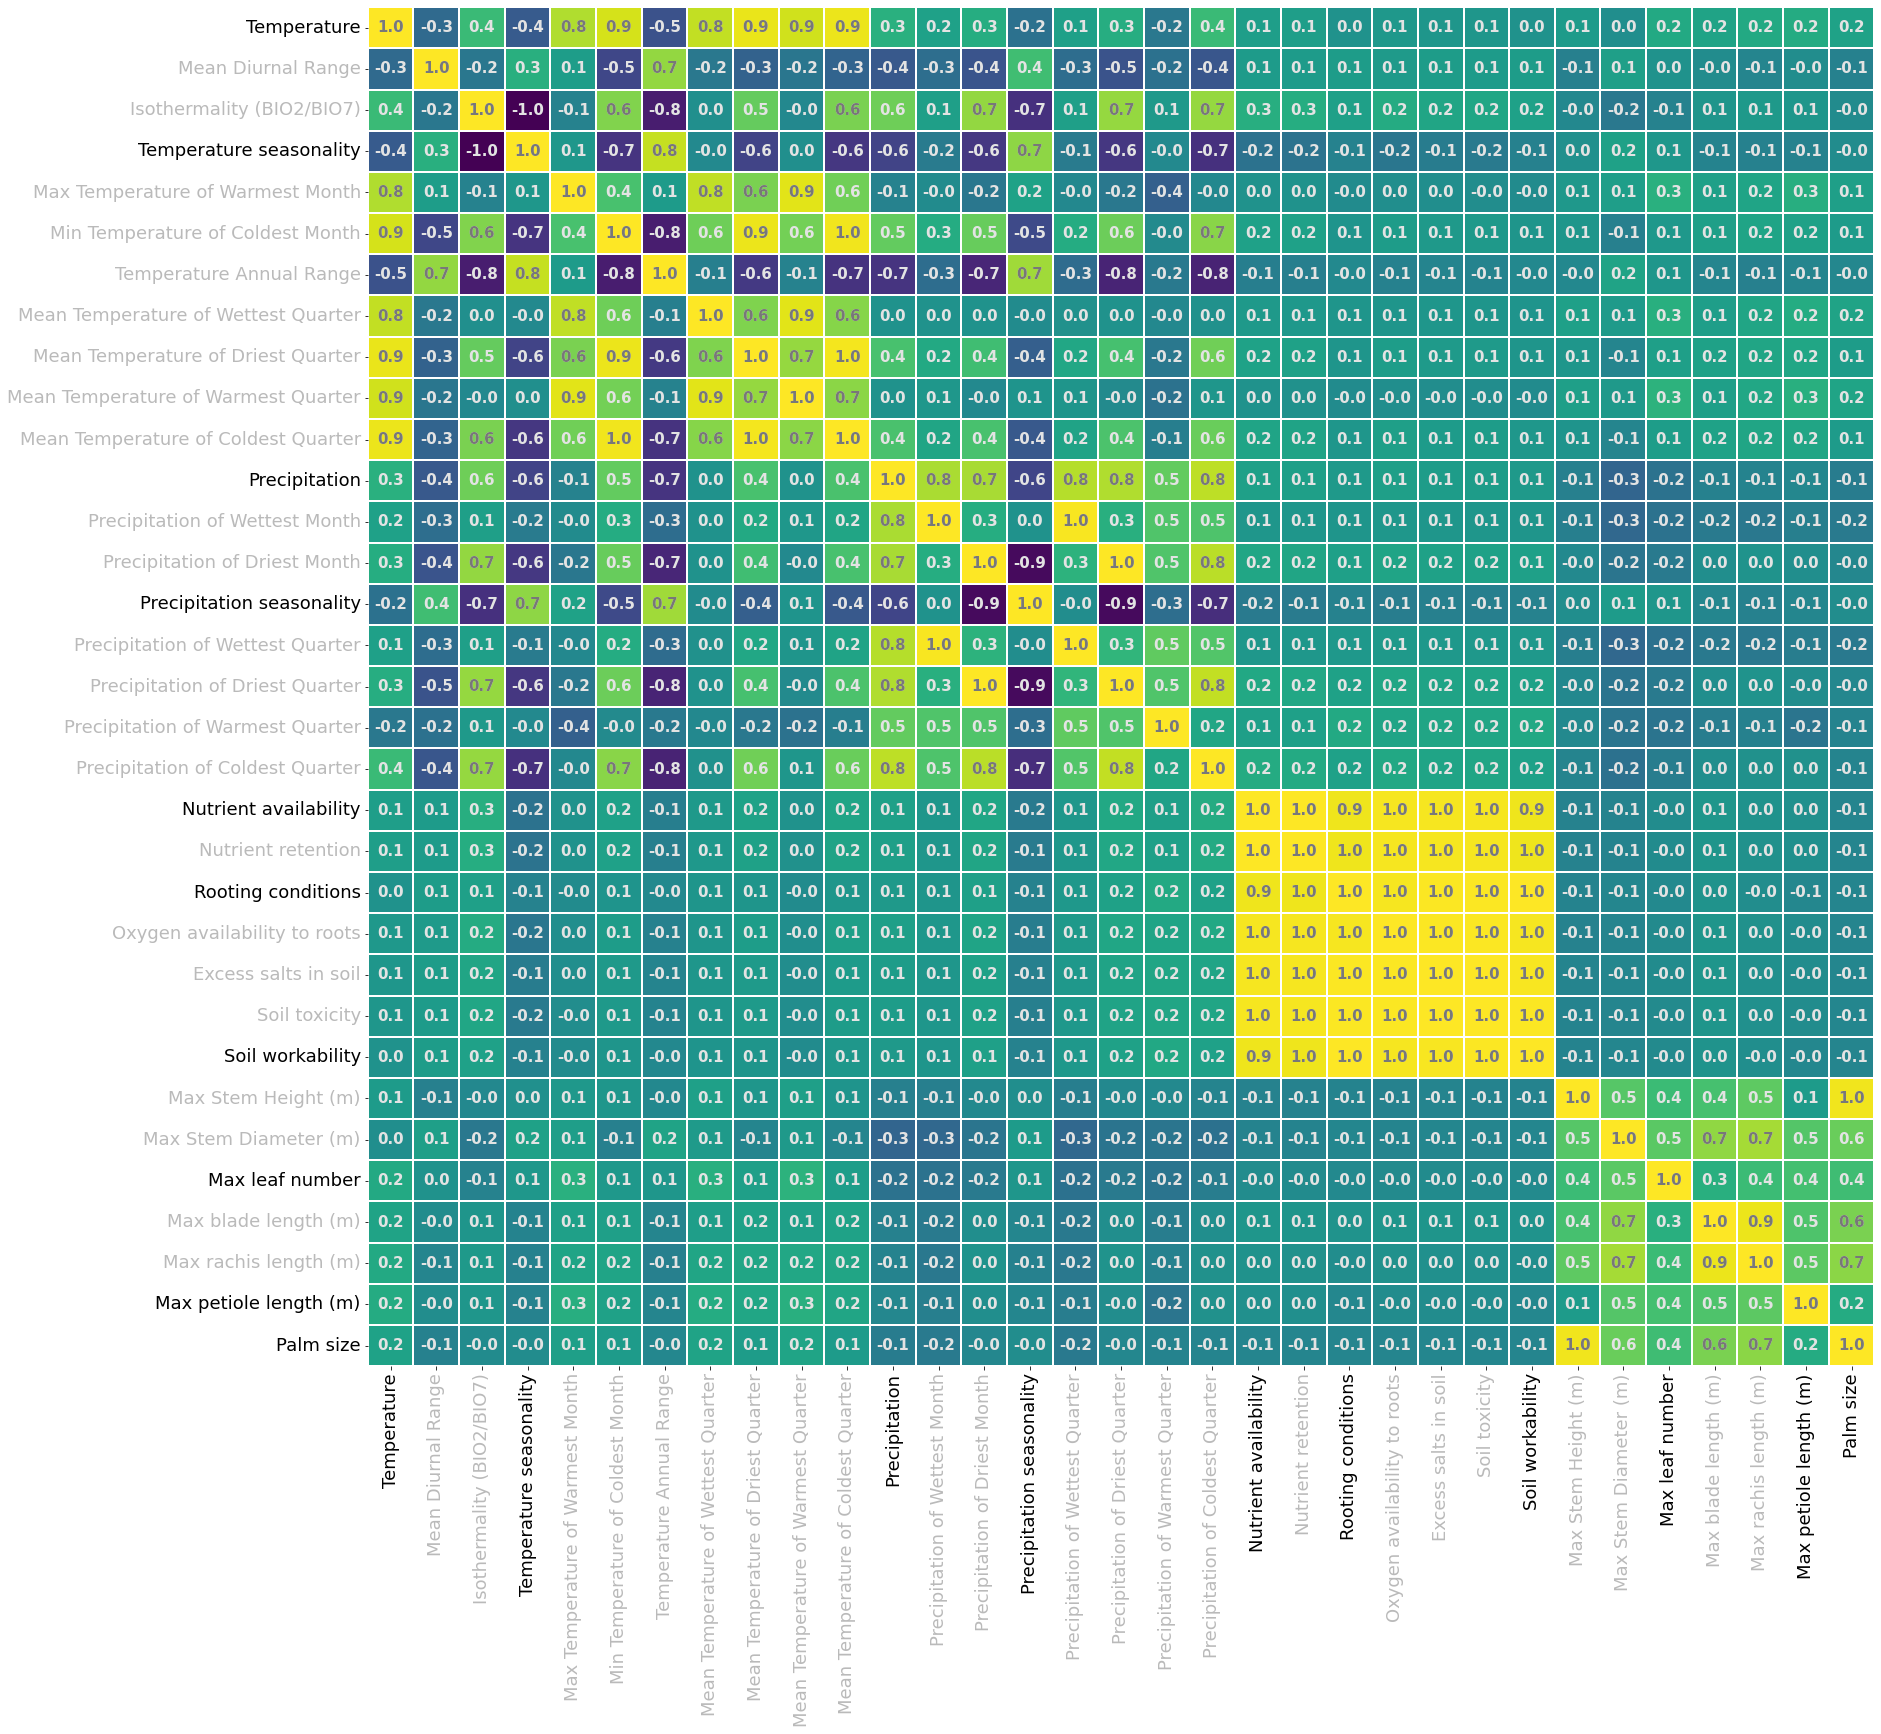

In [74]:
Fig,ax=plt.subplots(figsize=(27,25),facecolor='w')
hm=sns.heatmap(all_rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,fmt='.1f',annot_kws={'fontsize':15,'color':'#e3e3e3','fontweight':'bold'})
sns.heatmap(all_rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,mask=all_rho<0.6,fmt='.1f',annot_kws={'fontsize':15,'color':'#787878','fontweight':'bold'})
hm.set_xticklabels(hm.get_xticklabels(), rotation=90,fontdict={'fontsize':18,'verticalalignment':'top'}) #horizontalalignment
hm.set_yticklabels(hm.get_yticklabels(), rotation=0,fontdict={'fontsize':18,'verticalalignment':'center'}) #[ 'center' | 'top' | 'bottom' | 'baseline' ]

for tick,color in zip(ax.get_xticklabels(),allvariable_coldict.values()):
    tick.set_color(color)
for tick,color in zip(ax.get_yticklabels(),allvariable_coldict.values()):
    tick.set_color(color)
plt.show()

In [75]:
variables=palms[['bio1','bio4','bio12','bio15','nutrient_avail','rooting_conditions','workability','StemHeight+BladeLength','MaxLeafNumber','Max_Petiole_length_m']]
variables 

,bio1,bio4,bio12,bio15,nutrient_avail,rooting_conditions,workability,StemHeight+BladeLength,MaxLeafNumber,Max_Petiole_length_m
0,255.0,1638.0,1703.0,54.0,0.0,0.0,0.0,NaN,NaN,NaN
1,252.0,1524.0,1455.0,69.0,0.0,0.0,0.0,1.217484,1.491362,NaN
2,247.0,1938.0,1431.0,58.0,0.0,0.0,0.0,1.342423,1.204120,0.217484
3,203.0,2212.0,1310.0,72.0,0.0,0.0,0.0,NaN,NaN,NaN
4,240.0,1604.0,1562.0,73.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439333,NaN,NaN
2624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803457,NaN,0.123852
2626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
np.random.seed(666)
rho, pval=stats.spearmanr(variables,axis=0,nan_policy='omit')
print(pval)

[[0.00000000e+000 2.39384734e-069 5.18072341e-035 8.16939543e-023
  8.04084822e-009 8.44944845e-002 6.68840351e-002 3.86126395e-010
  9.01747276e-014 3.38523708e-014]
 [2.39384734e-069 0.00000000e+000 3.15245781e-151 1.22982541e-233
  2.90836036e-021 7.51704136e-005 2.09070267e-005 7.24444813e-001
  8.29183042e-003 2.36786755e-003]
 [5.18072341e-035 3.15245781e-151 0.00000000e+000 3.16705209e-145
  2.56219964e-010 7.49454368e-005 7.37552393e-005 1.99264112e-007
  2.02760295e-013 9.57859729e-002]
 [8.16939543e-023 1.22982541e-233 3.16705209e-145 0.00000000e+000
  1.29350070e-011 1.34683345e-004 1.12597531e-004 8.00571181e-001
  1.24958537e-002 6.16830173e-002]
 [8.04084822e-009 2.90836036e-021 2.56219964e-010 1.29350070e-011
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.63846701e-002
  6.93120163e-001 5.97604478e-001]
 [8.44944845e-002 7.51704136e-005 7.49454368e-005 1.34683345e-004
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.85377965e-002
  2.74057515e-001 1.15995026e-001

In [77]:
allvariable_dict={'bio1':'Temperature','bio4':'Temperature seasonality','bio12':'Precipitation','bio15':'Precipitation seasonality','nutrient_avail':'Nutrient availability',
                 'rooting_conditions':'Rooting conditions','workability':'Soil workability','MaxLeafNumber':'Max leaf number','Max_Petiole_length_m':'Max petiole length (m)',
                  'StemHeight+BladeLength': 'Palm size'}

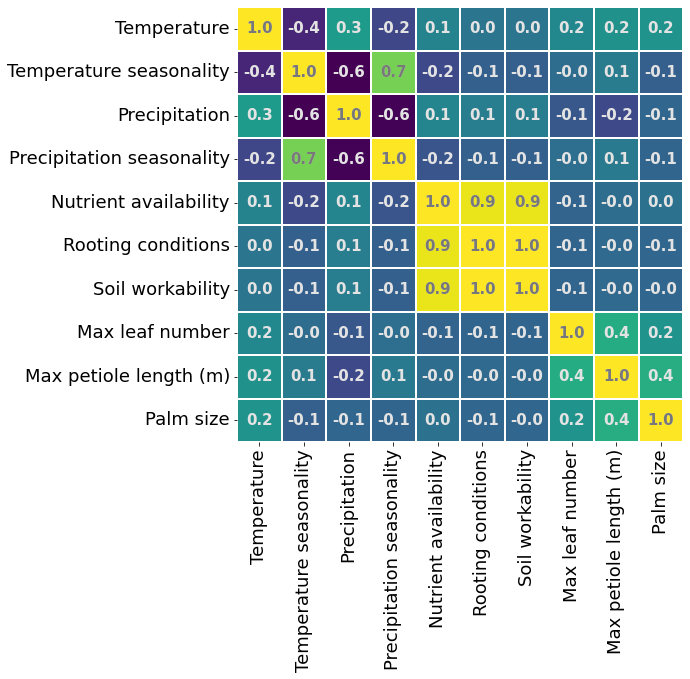

In [78]:
Fig,ax=plt.subplots(figsize=(8,8),facecolor='w')
hm=sns.heatmap(rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,fmt='.1f',annot_kws={'fontsize':15,'color':'#e3e3e3','fontweight':'bold'})
sns.heatmap(rho,cmap='viridis',linewidths=1,linecolor='white',xticklabels=allvariable_dict.values(),yticklabels=allvariable_dict.values(),ax=ax,cbar=False,
           annot=True,mask=rho<0.6,fmt='.1f',annot_kws={'fontsize':15,'color':'#787878','fontweight':'bold'})
hm.set_xticklabels(hm.get_xticklabels(), rotation=90,fontdict={'fontsize':18,'verticalalignment':'top'}) #horizontalalignment
hm.set_yticklabels(hm.get_yticklabels(), rotation=0,fontdict={'fontsize':18,'verticalalignment':'center'}) #[ 'center' | 'top' | 'bottom' | 'baseline' ]

plt.show()

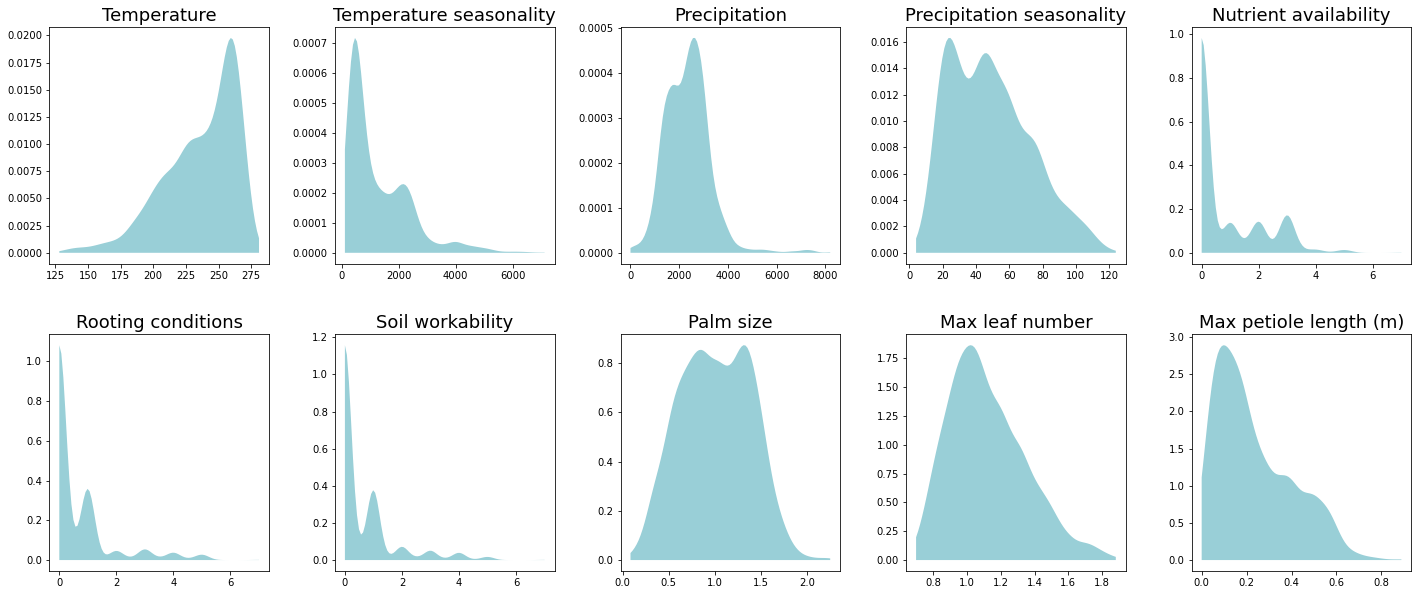

In [79]:
## Kernel Density Estimate of raw data for all variables
columns=variables.columns
# print(len(columns)) # 10 variables, 5 columns and 2 rows

fig=plt.figure(figsize=(25*2,5*2),facecolor='w')
# fig.suptitle('Kernel Density Estimation from the input values', size=18,y=1)
outer_grid=gridspec.GridSpec(2,10, wspace=0.3, hspace=0.3)
# outer_grid.tight_layout(fig,rect=[0, 0.03, 1, 0.95]) #rect=[0, 0.03, 1, 0.95]

for xx in range(0,5,1):
#     print(xx)
    ax=plt.subplot(outer_grid[0,xx])
    values=variables[columns[xx]].dropna().astype('float').values
    kde=gaussian_kde(values)
    x_grid=np.linspace(min(values),max(values),100)
    ax.fill_between(x_grid,kde(x_grid),alpha=0.4,edgecolor='none',facecolor='#00879c')
    plt.title('%s'%(allvariable_dict[columns[xx]]),fontdict={'fontsize':18})   
    
for xx in range(0,5,1):
#     print(xx)
    yy=xx+5
    ax=plt.subplot(outer_grid[1,xx])
    values=variables[columns[yy]].dropna().astype('float').values
    kde=gaussian_kde(values)
    x_grid=np.linspace(min(values),max(values),100)
    ax.fill_between(x_grid,kde(x_grid),alpha=0.4,edgecolor='none',facecolor='#00879c')
    plt.title('%s'%(allvariable_dict[columns[yy]]),fontdict={'fontsize':18})   
#     plt.xticks(())
#     plt.yticks(())

plt.show()